<p style="font-size:14px">
Em cenários acadêmicos, o desempenho dos alunos pode ser influenciado por diversos fatores, sendo as horas de estudo uma das mais óbvias. No entanto, o cansaço também pode ser um fator relevante, onde estudar por muitas horas seguidas pode resultar em uma menor eficiência, refletindo em notas mais baixas. Portanto, a proposta aqui é:
</p>

### Proposta 📋

<p style="font-size:14px">
1. Restringir o tempo máximo de estudo a 24 horas;<br>
2. Garantir que a nota final nunca ultrapasse o valor máximo de 100;<br>
3. Considerar se o aluno está "cansado" (0 para não cansado e 1 para cansado), o que impacta negativamente a nota.
</p>

### Observações 📋

<p style="font-size:14px">
1. Horas de Estudo: Um valor entre 0 e 24, onde quanto mais tempo o aluno estuda, maior a nota. No entanto, o efeito do estudo tem limites, e a produtividade começa a cair após um certo número de horas.<br> 
2. Cansado: Um valor binário (0 ou 1), onde "1" indica que o aluno está cansado, resultando em uma redução na nota final. <br>
3. O desempenho final (nota) é calculado com base nas horas de estudo, mas limitado ao valor máximo de 100. <br>
4. Se o aluno está cansado, a nota é reduzida. As notas são geradas com base em uma função linear, multiplicando as horas de estudo por um fator aleatório (para simular variações na eficiência), e se o aluno estiver cansado, subtraímos pontos da nota final.
</p>

In [423]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [424]:
# Gerar Seed:
np.random.seed()
n_samples = 365

# gerar Arrays:
horas_estudo = np.random.uniform(0,24,n_samples)
cansado = np.random.choice([0,0,1], n_samples)
nota = np.random.choice(range(0,100), n_samples)

In [425]:
# Garantir os valores corretos
data = pd.DataFrame({
    'Horas de estudo': horas_estudo,
    'Cansado': cansado,
    'Nota':nota
})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Horas de estudo  365 non-null    float64
 1   Cansado          365 non-null    int32  
 2   Nota             365 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 5.8 KB


In [426]:
# Alterando a coluna "Cansado" onde "Horas de estudo" > 15
data.loc[data['Horas de estudo'] > 15, 'Cansado'] = 1

In [427]:
# Função para alterar valores de 'Cansado'
def alterar_cansado(row):
    return np.random.choice([0,0,1])

# Aplicando a função diretamente na coluna 'Cansado' para as linhas filtradas
data.loc[data['Horas de estudo'] > 15, 'Cansado'] = data.loc[data['Horas de estudo'] > 15].apply(
    lambda row: alterar_cansado(row), axis=1
)


In [428]:
cores = data['Cansado'].replace(0,'blue').replace(1,'red')
hora_de_estudo = data['Horas de estudo'].values
valor_nota = data['Nota']
data['Cansado'].value_counts()

Cansado
0    243
1    122
Name: count, dtype: int64

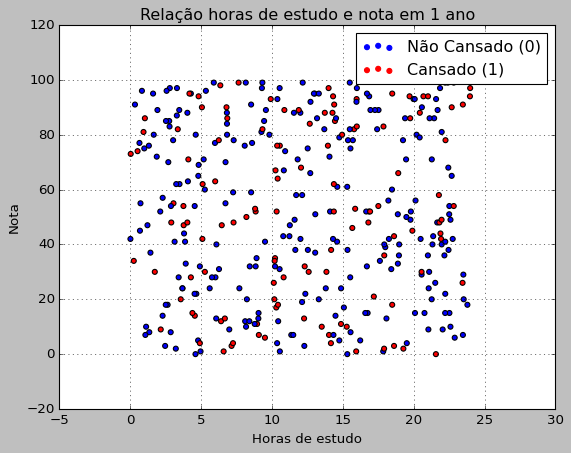

In [429]:
plt.style.use('classic')

# plot
fig, ax = plt.subplots()
ax.scatter(
    x=hora_de_estudo, 
    y=valor_nota,
    c=cores  # Usando as cores definidas
)

# Adicionar a legenda
# Utilizando os rótulos personalizados
ax.scatter([], [], color='blue', label='Não Cansado (0)')  # Exemplo para o valor 0
ax.scatter([], [], color='red', label='Cansado (1)')  # Exemplo para o valor 1

# Adicionar a legenda
plt.legend(loc='upper right')

plt.grid()
plt.xlabel('Horas de estudo')
plt.ylabel('Nota')
plt.title('Relação horas de estudo e nota em 1 ano')
plt.show()

In [430]:
# Treinamento:
# Dividir treino e teste >>
X = data[["Horas de estudo","Cansado"]]
y = data[["Nota"]]

In [431]:
# Criar variáveis de treino e teste:
X_train, X_teste, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [432]:
# Criando o modelo:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [433]:
def prever_nota(horas_estudo, cansado):
    nota_prevista = model.predict([[horas_estudo, cansado]])
    return nota_prevista[0]  

hora_estudo_input = float(input('Digite um horário (00-24): '))
cansado_input = int(input('1 para cansado, 0 não cansado: '))

if hora_estudo_input > 24 or hora_estudo_input < 0:
    print('Valor de horário é um valor inválido.')

if cansado_input not in [0,1]:
    print('Valor "cansado" possui valor inválido.')

nota_prevista = prever_nota(hora_estudo_input, cansado_input)
print(f'A nota predição foi: {nota_prevista}')

A nota predição foi: [55.17437061]


c:\Users\alzir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [434]:
result = model.score(X_teste, y_test)
print(f'Acurácia do modelo: ', result)

Acurácia do modelo:  -0.030361594310426288
